# MOVIE RATING PREDICTION

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings

In [29]:
ratings = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
users = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
movies = pd.read_csv('movies.dat', sep='::', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1', engine='python')
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df = pd.merge(pd.merge(ratings, users), movies)
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


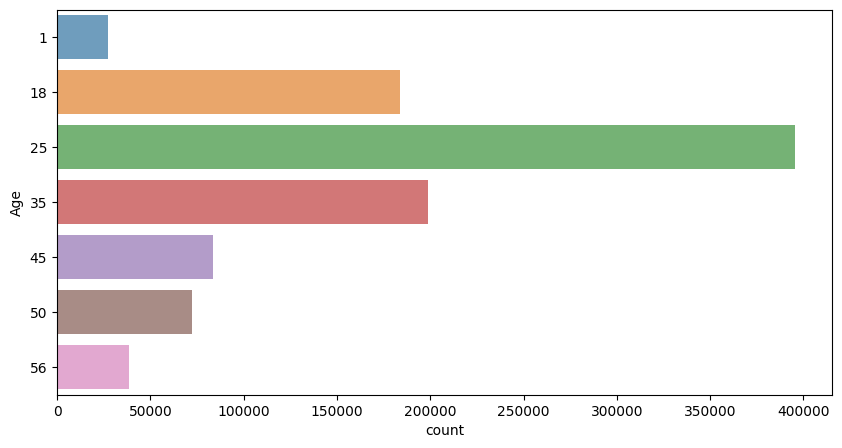

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(y='Age', data=df, alpha=0.7)
plt.show()

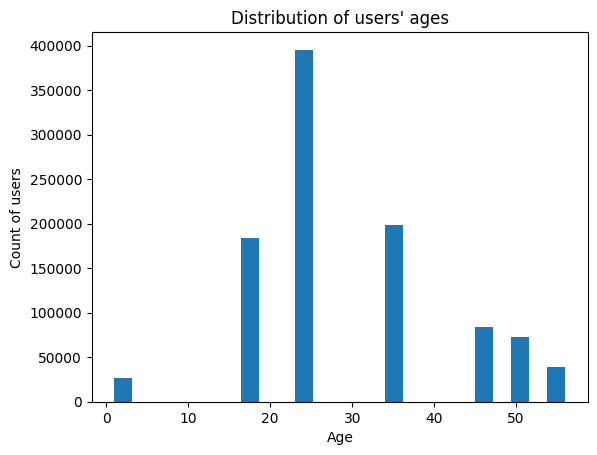

In [7]:
plt.hist(df['Age'], bins=25)
plt.title("Distribution of users' ages")
plt.xlabel('Age')
plt.ylabel('Count of users')
plt.show()

In [8]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
sample_age_groups = df[['Age', 'age_group']].drop_duplicates().head(10)
print(sample_age_groups)

    Age age_group
0     1       0-9
1    56     50-59
2    25     20-29
4    50     50-59
5    18     10-19
9    45     40-49
20   35     30-39


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


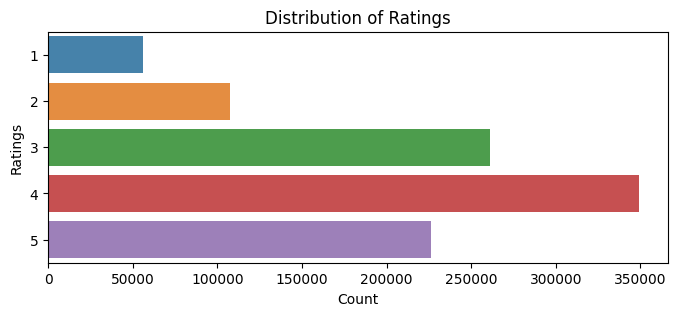

In [9]:
plt.figure(figsize=(8, 3))
sns.countplot(y='Rating', data=df, alpha=0.9)
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title("Distribution of Ratings")
plt.show()

In [10]:
# Grouping by movie names
movie_name_group = df.groupby('Title')
# Grouping by ratings
ratings_group = df.groupby('Rating')
# Grouping by user IDs
user_id_group = df.groupby('UserID')

In [11]:
movies = df['Title'].value_counts().sort_values(ascending=True)[:1000]
print(movies)

Title
Five Wives, Three Secretaries and Me (1998)     1
Song of Freedom (1936)                          1
Slappy and the Stinkers (1998)                  1
Anna (1996)                                     1
Death in Brunswick (1991)                       1
                                               ..
Concorde: Airport '79, The (1979)              37
My Boyfriend's Back (1993)                     37
Isn't She Great? (2000)                        37
Whipped (2000)                                 37
Idiots, The (Idioterne) (1998)                 37
Name: count, Length: 1000, dtype: int64


In [12]:
toy_story_data = df[df['Title'] == 'Toy Story 2 (1999)']
toy_story_data.shape

(1585, 11)

In [13]:
toy_story_data[['Title','age_group']]

,Title,age_group
55246,Toy Story 2 (1999),0-9
55247,Toy Story 2 (1999),20-29
55248,Toy Story 2 (1999),20-29
55249,Toy Story 2 (1999),30-39
55250,Toy Story 2 (1999),50-59
...,...,...
56826,Toy Story 2 (1999),20-29
56827,Toy Story 2 (1999),20-29
56828,Toy Story 2 (1999),10-19
56829,Toy Story 2 (1999),20-29


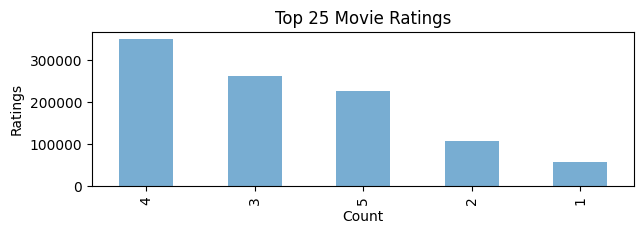

In [14]:
top25 = df[25:]
top25['Rating'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,2))
plt.title('Top 25 Movie Ratings')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.show()

In [15]:
userid_2696 = df[df['UserID'] == 2682]
print(userid_2696[['UserID', 'Rating']])

        UserID  Rating
26900     2682       5
42516     2682       4
63826     2682       2
66564     2682       3
80245     2682       3
...        ...     ...
938952    2682       1
957368    2682       5
962090    2682       4
965064    2682       1
992710    2682       1

[110 rows x 2 columns]


In [16]:
first_500 = df.head(500).dropna()

In [17]:
features = first_500[['MovieID', 'Age', 'Occupation']].values
labels = first_500['Rating'].values
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

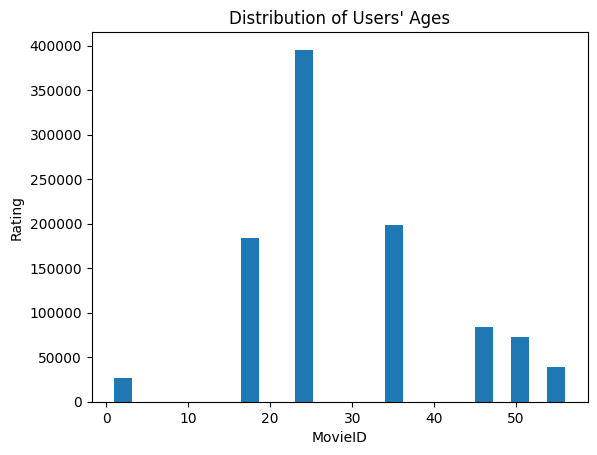

In [18]:
df['Age'].plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.xlabel('MovieID')
plt.ylabel('Rating')
plt.show()

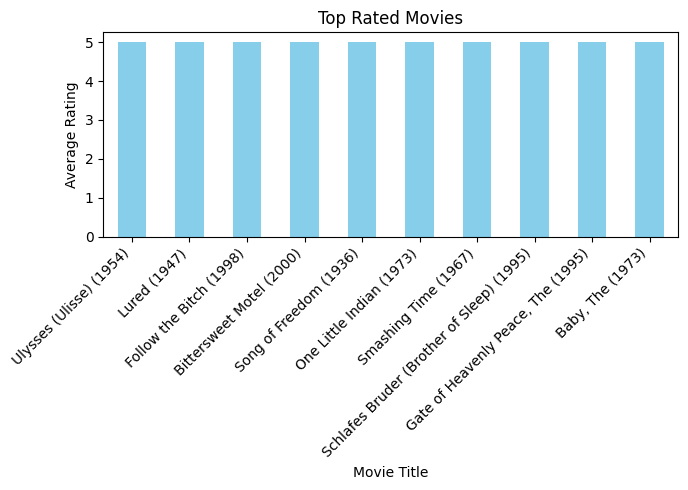

In [19]:
plt.figure(figsize=(7, 5))
top_rated_movies = df.groupby('Title')['Rating'].mean().sort_values(ascending=False)[:10]
top_rated_movies.plot(kind='bar', color='skyblue')
plt.title('Top Rated Movies')
plt.ylabel('Average Rating')
plt.xlabel('Movie Title')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

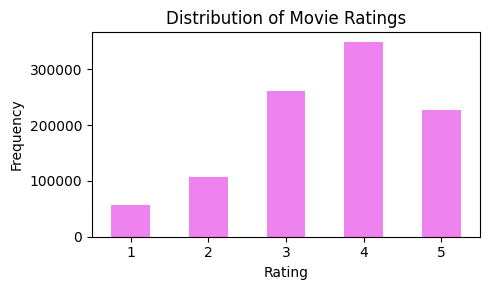

In [20]:
plt.figure(figsize=(5, 3))
rating_distribution = df['Rating'].value_counts().sort_index()
rating_distribution.plot(kind='bar', color='violet')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

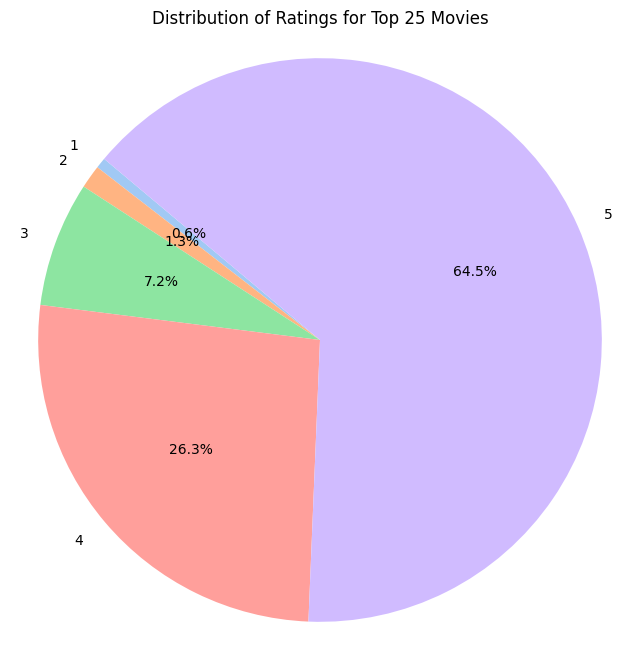

In [21]:
# Get the top 25 movies based on viewership rating
top_25_movies = df.groupby('Title')['Rating'].mean().sort_values(ascending=False)[:25]
rating_distribution = df[df['Title'].isin(top_25_movies.index)]['Rating'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Ratings for Top 25 Movies')
plt.axis('equal')  
plt.show()

In [22]:
# Calculate the average rating for each movie
average_ratings = df.groupby('Title')['Rating'].mean()
high_rated_movies = average_ratings[average_ratings > 4.5]
print("High Rated Movies:")
for movie_name, avg_rating in high_rated_movies.items():
    print(f"{movie_name}: {avg_rating:.2f}")

High Rated Movies:
Apple, The (Sib) (1998): 4.67
Baby, The (1973): 5.00
Bittersweet Motel (2000): 5.00
Close Shave, A (1995): 4.52
Follow the Bitch (1998): 5.00
Gate of Heavenly Peace, The (1995): 5.00
Godfather, The (1972): 4.52
I Am Cuba (Soy Cuba/Ya Kuba) (1964): 4.80
Lamerica (1994): 4.75
Lured (1947): 5.00
One Little Indian (1973): 5.00
Sanjuro (1962): 4.61
Schindler's List (1993): 4.51
Schlafes Bruder (Brother of Sleep) (1995): 5.00
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954): 4.56
Shawshank Redemption, The (1994): 4.55
Smashing Time (1967): 5.00
Song of Freedom (1936): 5.00
Ulysses (Ulisse) (1954): 5.00
Usual Suspects, The (1995): 4.52
Wrong Trousers, The (1993): 4.51


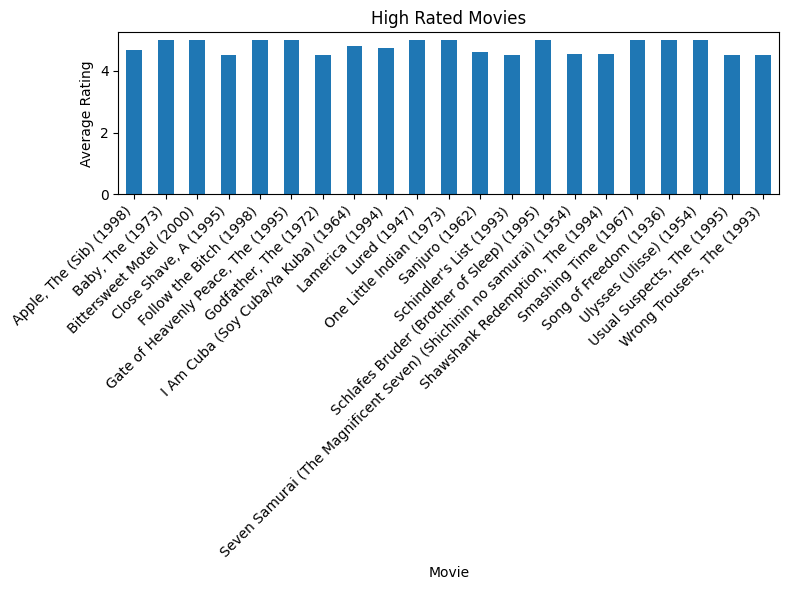

In [23]:
plt.figure(figsize=(8, 6))
high_rated_movies.plot(kind='bar')
plt.title('High Rated Movies')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

52.84

In [25]:
# Train and evaluate Support Vector Machines model
svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

52.84

In [26]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

52.84

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
acc_decision_tree = round(decision_tree.score(test, test_labels) * 100, 2)
print(f"Decision Tree Accuracy: {acc_decision_tree:.2f}%")

Decision Tree Accuracy: 38.18%


In [28]:
# Train and evaluate Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
acc_random_forest = round(random_forest.score(test, test_labels) * 100, 2)
print(f"Random Forest Accuracy: {acc_random_forest:.2f}%")

Random Forest Accuracy: 43.03%
